In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('data/PUBG/train_v2.csv')

In [4]:
train.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


# Using Heatmap to roughly see correlations

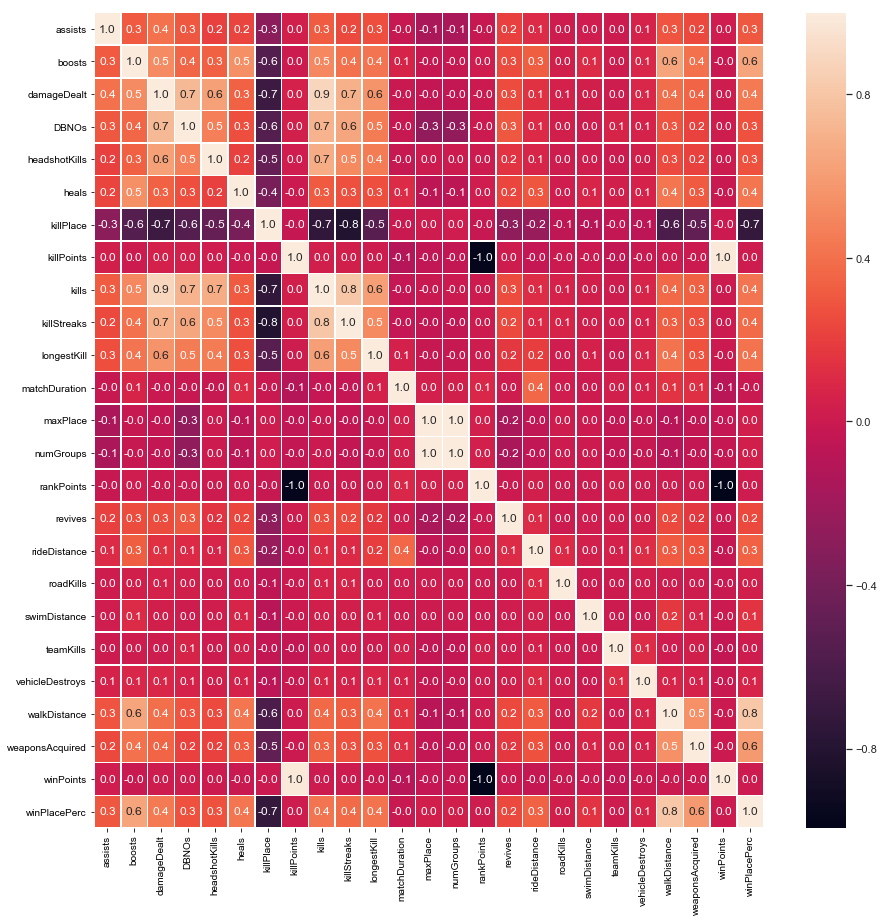

In [5]:
f,ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1)
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# Game type: Solo/Duo/Squad

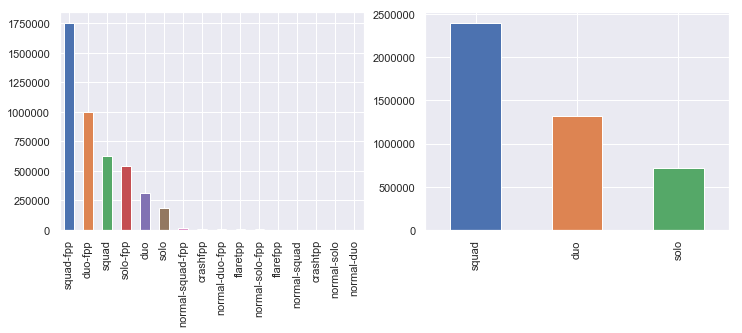

In [6]:
data = train['matchType'].copy()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
data.value_counts().plot.bar(ax=ax[0])


mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'].apply(mapper).value_counts().plot.bar(ax=ax[1])

# Game Sizes

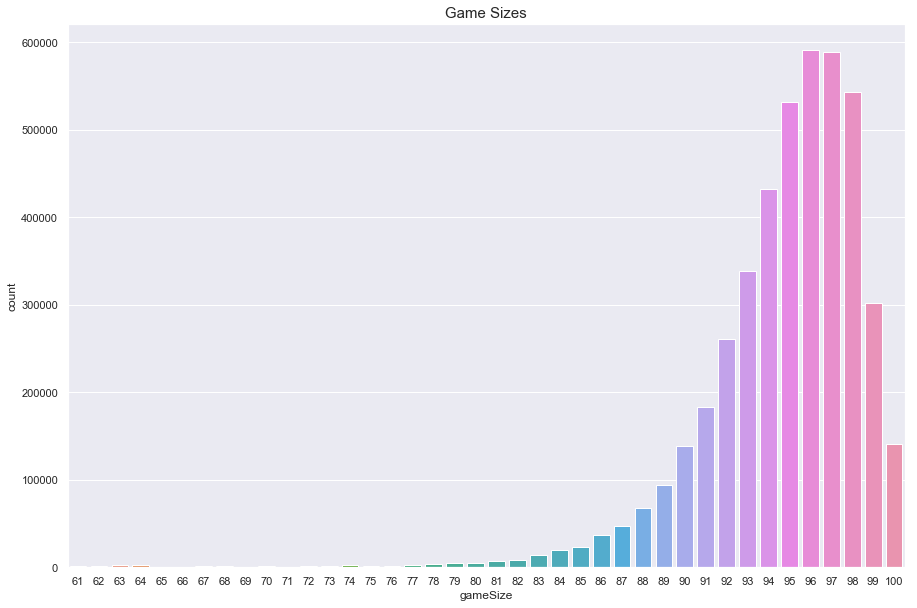

In [7]:
train['gameSize'] = train.groupby('matchId')['matchId'].transform('count')

data = train.copy()
data = data[data['gameSize']>60]
plt.figure(figsize=(15,10))
sns.countplot(data['gameSize'])
plt.title("Game Sizes",fontsize=15)
plt.show()

# Outliers: Zombies & Cheaters

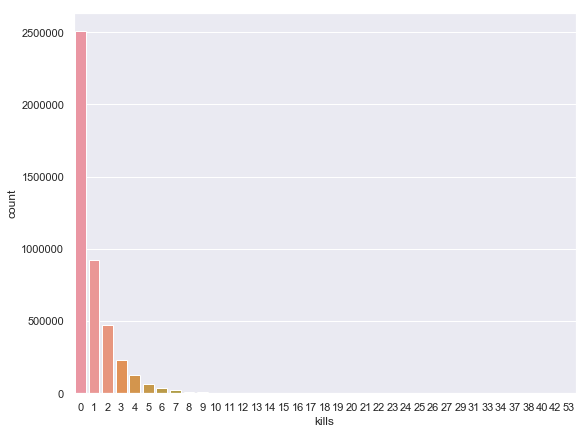

In [8]:
plt.figure(figsize=(9,7))
sns.countplot(data['kills'])

In [ ]:
plt.figure(figsize=(9,7))
sns.countplot(data['longestKill'])

NameError: name 'show_countplot' is not defined